## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

## Reading the dataset

In [2]:
data = pd.read_csv('masculinity.csv') # reading the csv file
data.head(4)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Na

In [3]:
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset has 1189 rows and 98 columns


## Data Preparation

In [4]:
dict(data.isna().sum()) # getting the nan values

{'Unnamed: 0': 0,
 'StartDate': 0,
 'EndDate': 0,
 'q0001': 0,
 'q0002': 0,
 'q0004_0001': 0,
 'q0004_0002': 0,
 'q0004_0003': 0,
 'q0004_0004': 0,
 'q0004_0005': 0,
 'q0004_0006': 0,
 'q0005': 0,
 'q0007_0001': 0,
 'q0007_0002': 0,
 'q0007_0003': 0,
 'q0007_0004': 0,
 'q0007_0005': 0,
 'q0007_0006': 0,
 'q0007_0007': 0,
 'q0007_0008': 0,
 'q0007_0009': 0,
 'q0007_0010': 0,
 'q0007_0011': 0,
 'q0008_0001': 0,
 'q0008_0002': 0,
 'q0008_0003': 0,
 'q0008_0004': 0,
 'q0008_0005': 0,
 'q0008_0006': 0,
 'q0008_0007': 0,
 'q0008_0008': 0,
 'q0008_0009': 0,
 'q0008_0010': 0,
 'q0008_0011': 0,
 'q0008_0012': 0,
 'q0009': 0,
 'q0010_0001': 613,
 'q0010_0002': 613,
 'q0010_0003': 613,
 'q0010_0004': 613,
 'q0010_0005': 613,
 'q0010_0006': 613,
 'q0010_0007': 613,
 'q0010_0008': 613,
 'q0011_0001': 613,
 'q0011_0002': 613,
 'q0011_0003': 613,
 'q0011_0004': 613,
 'q0011_0005': 613,
 'q0012_0001': 613,
 'q0012_0002': 613,
 'q0012_0003': 613,
 'q0012_0004': 613,
 'q0012_0005': 613,
 'q0012_0006': 6

In [5]:
# dropping the unwanted columns

data.drop(columns = ['Unnamed: 0', 'StartDate', 'EndDate', 'q0013', 'q0034'], inplace = True) 

In [6]:
# replacing No answer with nan
# for all the columns

data.replace('No answer', np.nan, inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df = data.copy() # copy of the dataframe
encoders = dict()

for col_name in df.columns: # for all the columns
    series = df[col_name] 
    label_encoder = LabelEncoder() # object of LabelEncoder
    # labelling all the values in the column
    df[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

In [9]:
df.head()

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,2.0,2.0,1,1,0,1,1,0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,4.0,4.0,0.0,2.0,0,0,1,0,1,0,0,0,1,1,0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0.0,2.0,0,0,0,1.0,2,1,32,2.0,3.0,0,1,0.0,0.0,1.0,1.0,0.0,325.0
1,2.0,2.0,0,1,0,0,1,0,1.0,3.0,4.0,1.0,3.0,0.0,3.0,0.0,2.0,0.0,4.0,NaN,0,1,0,0,1,0,0,1,1,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,1,0,0,1,0,0.0,4.0,0,1,1,3.0,4,5,35,0.0,4.0,1,4,2.0,3.0,2.0,0.0,2.0,296.0
2,3.0,1.0,0,1,0,0,1,1,0.0,4.0,4.0,4.0,3.0,1.0,2.0,0.0,3.0,4.0,3.0,0.0,0,0,0,0,1,0,0,0,1,0,0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,1,0,0,0,1,0,0.0,1.0,0,1,1,3.0,4,1,22,0.0,3.0,1,4,0.0,0.0,1.0,0.0,2.0,153.0
3,3.0,1.0,0,0,1,0,1,0,0.0,3.0,3.0,4.0,3.0,3.0,2.0,0.0,0.0,3.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,1,1,0,0,0,1,1,NaN,1.0,0,1,1,NaN,4,5,14,0.0,3.0,1,4,2.0,3.0,2.0,0.0,NaN,182.0
4,3.0,3.0,1,1,1,0,1,0,1.0,4.0,3.0,0.0,1.0,1.0,4.0,0.0,2.0,3.0,1.0,4.0,0,1,0,0,1,0,0,0,0,0,0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0.0,2.0,0,0,0,3.0,4,1,35,0.0,3.0,1,4,0.0,0.0,1.0,1.0,2.0,277.0


In [10]:
df.dropna(subset = ['q0026'], inplace = True) # dropping the nan values in q0026 column

In [11]:
# using KNN Imputer to fill nan values

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2) # object of KNN Imputer
main_df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns) # fitting on the dataframe
main_df.head()

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,4.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.5,0.5,0.5,0.5,1.0,4.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,32.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,325.0
1,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.5,0.5,1.0,0.5,1.0,0.5,0.5,0.0,1.0,0.0,0.5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.5,0.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,1.0,3.0,4.0,5.0,35.0,0.0,4.0,1.0,4.0,2.0,3.0,2.0,0.0,2.0,296.0
2,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,4.0,4.0,3.0,1.0,2.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,4.0,1.0,22.0,0.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,2.0,153.0
3,3.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,3.0,0.0,1.0,1.0,4.0,0.0,2.0,3.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,4.0,1.0,35.0,0.0,3.0,1.0,4.0,0.0,0.0,1.0,1.0,2.0,277.0
4,3.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,4.0,3.0,1.0,2.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,4.0,4.0,14.0,0.0,3.0,1.0,4.0,0.0,2.0,2.0,0.0,2.0,16.0


In [12]:
# normalizing all the columns in the dataframe
# using Min-Max Scaler

normalised_df = (main_df - main_df.min())/(main_df.max() - main_df.min())
normalised_df.head()

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,0.666667,0.666667,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.50,0.50,0.50,0.50,0.00,0.00,0.5,1.00,1.00,0.00,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.4,0.5,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.5,0.5,0.166667,0.5,1.0,1.00,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.0,0.0,0.0,0.333333,0.5,0.2,0.64,0.25,0.75,0.0,0.25,0.0,0.000000,0.5,1.0,0.0,0.730337
1,0.666667,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.75,1.00,0.25,0.75,0.00,0.75,0.0,0.50,0.00,1.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,0.5,0.0,1.0,0.0,0.5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.0,0.75,0.0,0.0,0.5,0.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.00,0.0,1.0,1.0,1.000000,1.0,1.0,0.70,0.00,1.00,1.0,1.00,1.0,1.000000,1.0,0.0,1.0,0.665169
2,1.000000,0.333333,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.00,1.00,1.00,0.75,0.25,0.50,0.0,0.75,1.00,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,1.00,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.25,0.0,1.0,1.0,1.000000,1.0,0.2,0.44,0.00,0.75,1.0,1.00,0.0,0.000000,0.5,0.0,1.0,0.343820
3,1.000000,1.000000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.00,0.75,0.00,0.25,0.25,1.00,0.0,0.50,0.75,0.25,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.0,0.0,0.0,1.000000,1.0,0.2,0.70,0.00,0.75,1.0,1.00,0.0,0.000000,0.5,1.0,1.0,0.622472
4,1.000000,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.25,1.00,1.00,0.75,0.25,0.50,0.0,1.00,0.50,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.25,0.0,1.0,1.0,1.000000,1.0,0.8,0.28,0.00,0.75,1.0,1.00,0.0,0.666667,1.0,0.0,1.0,0.035955


## KMeans

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters = 3, random_state = 42, max_iter = 100) # KMeans with 3 clusters
model.fit(normalised_df) # training the model
print(model.cluster_centers_[0])

[7.06721915e-01 4.58563536e-01 3.72928177e-01 5.99447514e-01
 3.03867403e-01 2.37569061e-01 6.07734807e-01 1.98895028e-01
 6.29834254e-01 7.32389503e-01 7.39640884e-01 5.97720994e-01
 7.18922652e-01 2.26174033e-01 5.55593923e-01 1.79558011e-01
 6.11878453e-01 6.22237569e-01 3.44613260e-01 6.69889503e-01
 5.24861878e-02 5.66298343e-01 1.79558011e-01 3.72928177e-01
 9.08839779e-01 1.46408840e-01 2.23756906e-01 2.81767956e-01
 5.49723757e-01 4.91712707e-01 1.96132597e-01 8.56353591e-01
 4.68508287e-01 8.23204420e-01 7.61049724e-01 8.66022099e-01
 8.30110497e-01 9.44751381e-01 9.11602210e-01 4.03314917e-01
 8.56353591e-02 8.17679558e-01 5.05524862e-01 5.15193370e-01
 6.69889503e-01 4.83425414e-02 9.40607735e-01 9.39226519e-01
 9.44751381e-01 9.39226519e-02 9.41988950e-01 2.99723757e-01
 6.21546961e-02 3.94567219e-01 3.14917127e-01 6.24309392e-01
 3.87776243e-01 3.54972376e-01 1.47790055e-01 3.41160221e-01
 2.96961326e-01 5.81491713e-01 7.45856354e-02 8.56353591e-02
 4.30939227e-01 6.878453

In [15]:
model.labels_[:5]

array([0, 2, 2, 0, 2])

In [16]:
# parameters for KMeans

params = {
    'init' : 'random',
    'n_init' :10,
    'max_iter' :300,
    'random_state' :42
}

sse = [] # list to store intertia of different clusters

for k in range(1, 11):
    model = KMeans(n_clusters = k, **params) # creating the model
    model.fit(normalised_df) # training the model
    sse.append(model.inertia_) # appending the inertia value 

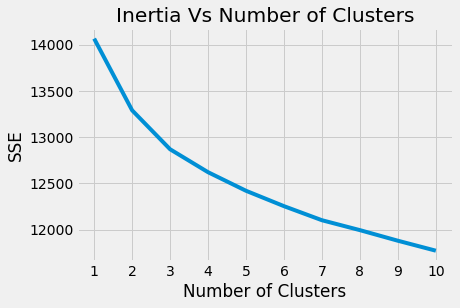

In [17]:
plt.style.use("fivethirtyeight")

# line plot for cluster number and inertia
plt.plot(range(1, 11), sse) 
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters") # xlabel
plt.ylabel("SSE") # ylabel
plt.title('Inertia Vs Number of Clusters') # title
plt.show()

We can see that there is a elbow like shape ending at cluster number 3. We can also check the optimum number of clusters programmatically.

In [18]:
!pip install kneed --quiet

In [19]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [20]:
kl = KneeLocator(
        range(1, 11), sse, curve = 'convex', direction = 'decreasing'
 )
kl.elbow

3

In [21]:
silhouette_coefficients = [] # empty list


for k in range(2, 11):
    model = KMeans(n_clusters = k, **params) # model creation
    model.fit(normalised_df) # training
    score = silhouette_score(normalised_df, model.labels_) # finding the silhouette_coefficients
    silhouette_coefficients.append(score) # appending the silhouette_coefficients

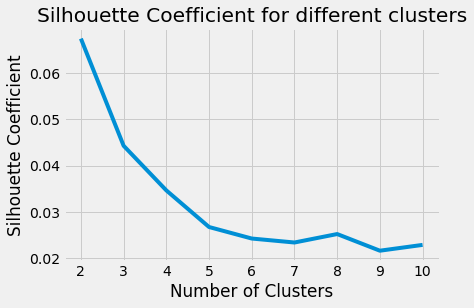

In [22]:
plt.style.use("fivethirtyeight")

# line plot for cluster number and silhouette_coefficients
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters") # xlabel
plt.ylabel("Silhouette Coefficient") # ylabel
plt.title('Silhouette Coefficient for different clusters') # title
plt.show()